In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as skl

In [134]:
!jupyter run price_prediction.ipynb


{'cells': [{'cell_type': 'code',
   'execution_count': 98,
   'metadata': {},
   'outputs': [],
   'source': ['import pandas as pd\n',
    'import numpy as np\n',
    'import matplotlib.pyplot as plt\n',
    'import seaborn as sns \n',
    'import sklearn as skl']},
  {'cell_type': 'code',
   'execution_count': 134,
   'metadata': {},
   'outputs': [],
   'source': ['!jupyter run price_prediction.ipynb\n']},
  {'cell_type': 'code',
   'execution_count': 99,
   'metadata': {},
   'outputs': [{'data': {'text/html': ['<div>\n',
       '<style scoped>\n',
       '    .dataframe tbody tr th:only-of-type {\n',
       '        vertical-align: middle;\n',
       '    }\n',
       '\n',
       '    .dataframe tbody tr th {\n',
       '        vertical-align: top;\n',
       '    }\n',
       '\n',
       '    .dataframe thead th {\n',
       '        text-align: right;\n',
       '    }\n',
       '</style>\n',
       '<table border="1" class="dataframe">\n',
       '  <thead>\n',
       '    <

d:\Swinburne\Year 2 - Sem 2\Computing Design Innovation Project\Project ENV\.venv\Lib\site-packages\zmq\_future.py:724: RuntimeWarning: Proactor event loop does not implement add_reader family of methods required for zmq. Registering an additional selector thread for add_reader support via tornado. Use `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())` to avoid this warning.
  self._get_loop()
[IPKernelApp] WARNING | Parent appears to have exited, shutting down.



       '  text-decoration: none;\n',
       '  /* unfitted */\n',
       '  color: var(--sklearn-color-unfitted-level-1);\n',
       '  border: var(--sklearn-color-unfitted-level-1) 1pt solid;\n',
       '}\n',
       '\n',
       '#sk-container-id-9 a.estimator_doc_link.fitted {\n',
       '  /* fitted */\n',
       '  border: var(--sklearn-color-fitted-level-1) 1pt solid;\n',
       '  color: var(--sklearn-color-fitted-level-1);\n',
       '}\n',
       '\n',
       '/* On hover */\n',
       '#sk-container-id-9 a.estimator_doc_link:hover {\n',
       '  /* unfitted */\n',
       '  background-color: var(--sklearn-color-unfitted-level-3);\n',
       '  color: var(--sklearn-color-background);\n',
       '  text-decoration: none;\n',
       '}\n',
       '\n',
       '#sk-container-id-9 a.estimator_doc_link.fitted:hover {\n',
       '  /* fitted */\n',
       '  background-color: var(--sklearn-color-fitted-level-3);\n',
       '}\n',
       '</style><div id="sk-container-id-9" class="

In [99]:
data = pd.read_csv("database/csv1.csv")
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-04-01,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57696,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
57697,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
57698,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
57699,Thomastown,3/1 Travers St,3,u,830000.0,PI,Barry,2018-03-31,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


<strong>Checking for Nan Values</strong>

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57701 entries, 0 to 57700
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         57701 non-null  object 
 1   Address        57701 non-null  object 
 2   Rooms          57701 non-null  int64  
 3   Type           57701 non-null  object 
 4   Price          57701 non-null  float64
 5   Method         57701 non-null  object 
 6   SellerG        57701 non-null  object 
 7   Date           57701 non-null  object 
 8   Postcode       57701 non-null  int64  
 9   Regionname     57701 non-null  object 
 10  Propertycount  57701 non-null  int64  
 11  Distance       57701 non-null  float64
 12  CouncilArea    57701 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.7+ MB


<strong>Droping the Nan Values</strong>

In [101]:
data.dropna(inplace=True)

<strong>Spliting the train and test data</strong>

In [102]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price'], axis=1)
Y = data['Price']

X

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,S,Barry,2017-04-01,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...
57696,Roxburgh Park,3 Carr Pl,3,h,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
57697,Roxburgh Park,9 Parker Ct,3,h,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
57698,Roxburgh Park,5 Parkinson Wy,3,h,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
57699,Thomastown,3/1 Travers St,3,u,PI,Barry,2018-03-31,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

<strong>Analising Basic Correlation</strong>

In [104]:
train_data = X_train.join(Y_train)
train_data

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price
34641,Eltham,15 Frank St,3,h,S,Morrison,2018-05-19,3095,Eastern Metropolitan,6990,18.0,Banyule City Council,950000.0
24079,Preston,23 Dean St,4,h,SP,Nelson,2016-05-14,3072,Northern Metropolitan,14577,8.4,Darebin City Council,1260000.0
32265,Kew,3/15 Atkins St,3,h,S,Jellis,2017-03-18,3101,Southern Metropolitan,10331,5.4,Boroondara City Council,830000.0
11677,Chelsea,1/36 Woodbine Gr,3,h,S,Eview,2016-11-07,3196,South-Eastern Metropolitan,3906,27.0,Kingston City Council,800000.0
36375,Craigieburn,59 Riverside Dr,4,h,SP,Purplebricks,2017-05-20,3064,Northern Metropolitan,15510,20.6,Hume City Council,545000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53608,Deer Park,26 Jonah Pde,3,h,S,FN,2016-08-28,3023,Western Metropolitan,6388,14.8,Brimbank City Council,430000.0
6232,Craigieburn,13 Berrima Cl,3,h,S,Ray,2016-06-04,3064,Northern Metropolitan,15510,20.6,Hume City Council,387000.0
24139,St Albans,23 Kodre St,3,h,S,FN,2016-05-14,3021,Western Metropolitan,14042,14.0,Brimbank City Council,447500.0
26009,Strathmore,3/16 Wendora St,3,t,VB,Brad,2018-09-15,3041,Western Metropolitan,3284,8.2,Moonee Valley City Council,900000.0


In [105]:
train_data.Suburb.value_counts()

Suburb
Reservoir            969
Bentleigh East       648
Craigieburn          624
Richmond             594
Mount Waverley       586
                    ... 
Castella               1
Wandin North           1
Belgrave Heights       1
Lysterfield South      1
Avonsleigh             1
Name: count, Length: 377, dtype: int64

In [106]:
pd.get_dummies(train_data.Suburb)

,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,...,Wollert,Wonga Park,Woori Yallock,Wyndham Vale,Yallambie,Yan Yean,Yarra Glen,Yarra Junction,Yarraville,viewbank
34641,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24079,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36375,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<strong>Checking the Distribution between the feature colomns</strong>

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Propertycount'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

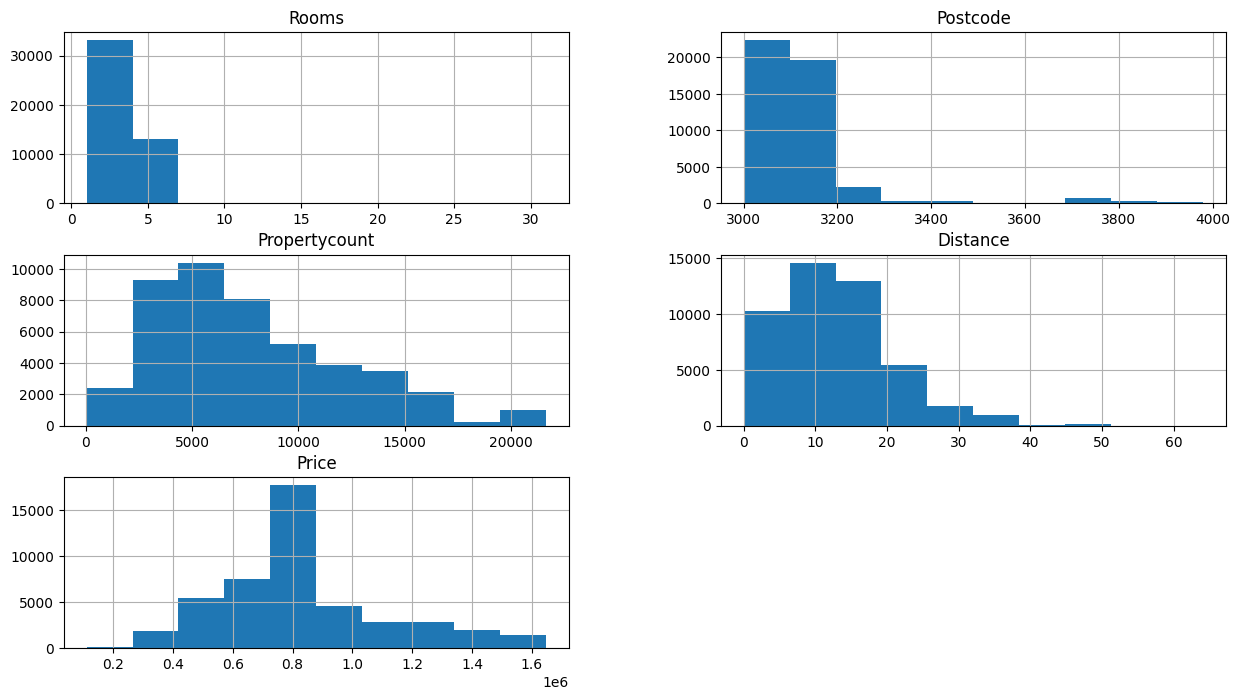

In [107]:
train_data.hist(figsize=(15, 8))

In [108]:
# Exclude non-numeric columns before calculating correlation
numeric_columns = train_data.select_dtypes(include=['number']).columns
numeric_train_data = train_data[numeric_columns]

#correlation on numeric data
correlation_matrix = numeric_train_data.corr()
correlation_matrix

,Rooms,Postcode,Propertycount,Distance,Price
Rooms,1.000000,0.097276,-0.046699,0.318687,0.302604
Postcode,0.097276,1.000000,0.000555,0.513765,-0.033458
Propertycount,-0.046699,0.000555,1.000000,0.012980,-0.074466
Distance,0.318687,0.513765,0.012980,1.000000,-0.181085
Price,0.302604,-0.033458,-0.074466,-0.181085,1.000000


<strong>Building Correlation matix Heatmap</strong>

<Axes: >

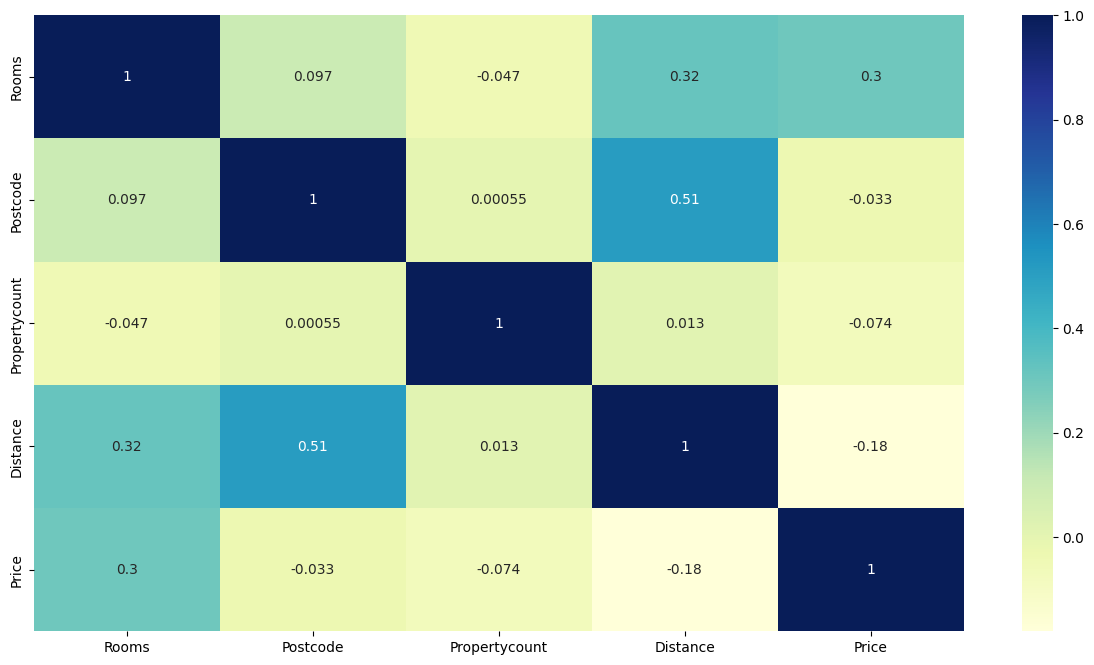

In [109]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

<h1><strong>Model Devolopment - Linear Regressor Model</strong></h1>

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = train_data.select_dtypes(include=['number']).columns
numeric_train_data = train_data[numeric_columns]
x_train, y_train = numeric_train_data.drop(['Price'], axis=1), numeric_train_data['Price']
x_train_s = scaler.fit_transform(x_train)

regressor = LinearRegression()
regressor.fit(x_train_s, y_train)

LinearRegression()

In [111]:
test_data = X_test.join(Y_test)

numeric_columns = test_data.select_dtypes(include=['number']).columns
numeric_test_data = test_data[numeric_columns]

X_test, Y_test = numeric_test_data.drop(['Price'], axis=1), numeric_test_data['Price']

Y_test


45132    1220000.0
43251     830000.0
24408     960000.0
15861     867500.0
29483    1430000.0
           ...    
43254     629000.0
22619     600500.0
27713     830000.0
19051     800000.0
23258     923000.0
Name: Price, Length: 11541, dtype: float64

In [114]:
X_test_s = scaler.transform(X_test)

In [119]:
regressor.predict(X_test_s)

regressor.score(X_test_s, Y_test)

0.19331442893352369

<h1><strong>Model Devolopment - Random Forest Regressor</strong></h1>

In [122]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor()

forest_regressor.fit(x_train_s, y_train)

RandomForestRegressor()

In [123]:
forest_regressor.score(X_test_s, Y_test)

0.44124676070283875

<strong>Grid Search Cross Validation for more model Accuracy</strong>

In [124]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest_regressor, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [129]:
best_forest_regressor = grid_search.best_estimator_
best_forest_regressor

RandomForestRegressor(max_features=2, n_estimators=30)

In [130]:
best_forest_regressor.score(X_test_s, Y_test)

0.44083537950043505